# POKER HAND PREDICTOR {}

## step1: importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## step2: Loading Dataset

In [9]:
poker_df = pd.read_csv('/content/poker_hand_test.data')
poker_df

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


##Step2: analysing the dataset


adding label names for refernce purpose

In [10]:
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


##Step4: seperation of X and Y

In [12]:
X = poker_df.iloc[:, 0:9]
y = poker_df.hand

##Step5: Visualising the class balance for my dataset

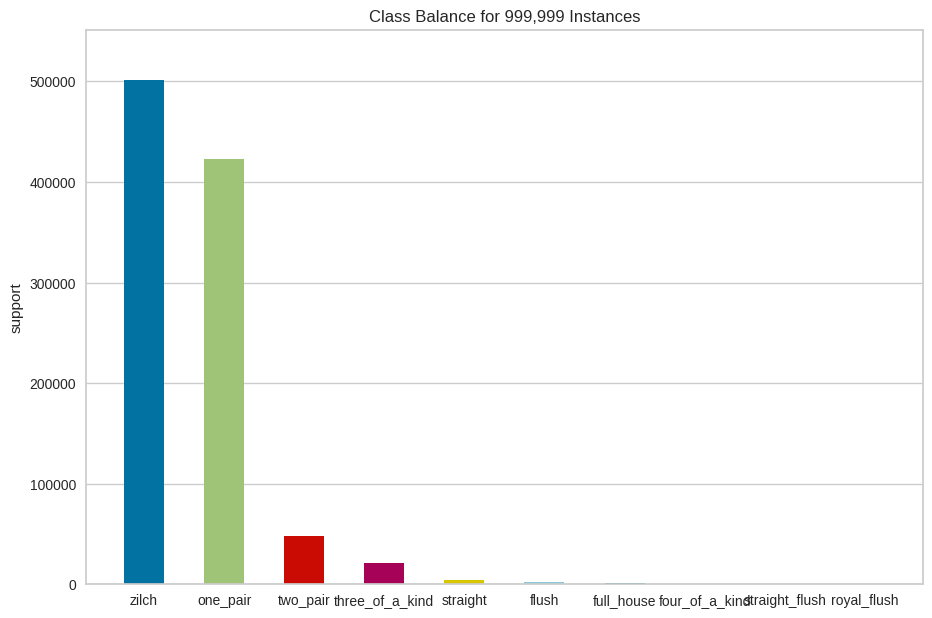

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [13]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

##Step6: handling minor samples by grouping it

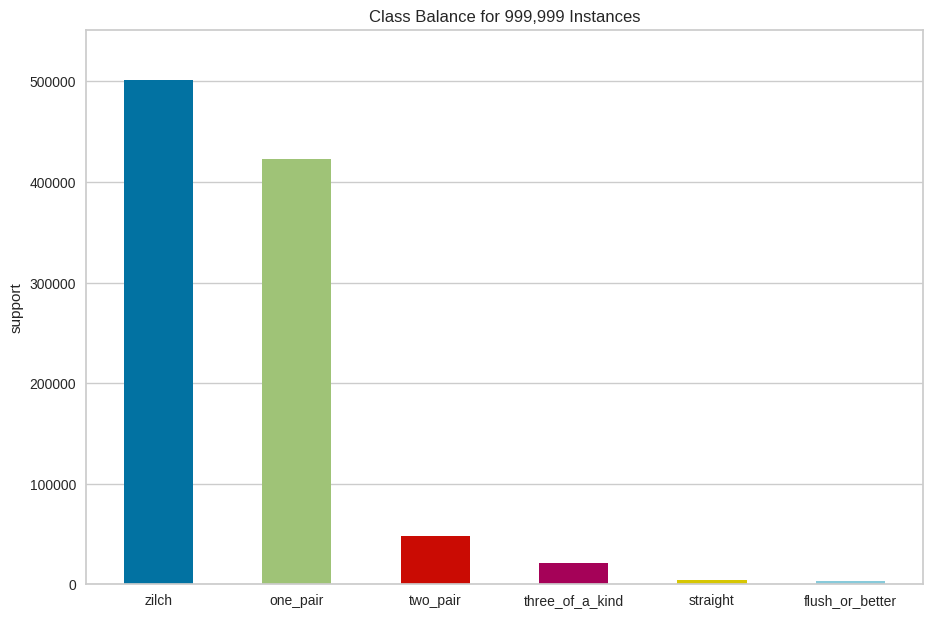

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [14]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

##Step7: traing the actual model for classification

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

##Step8: evaluating the model outcome now

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.7759355518711037
Accuracy of the Model on Test Data is : 0.774456


##Step9: making classification report now

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


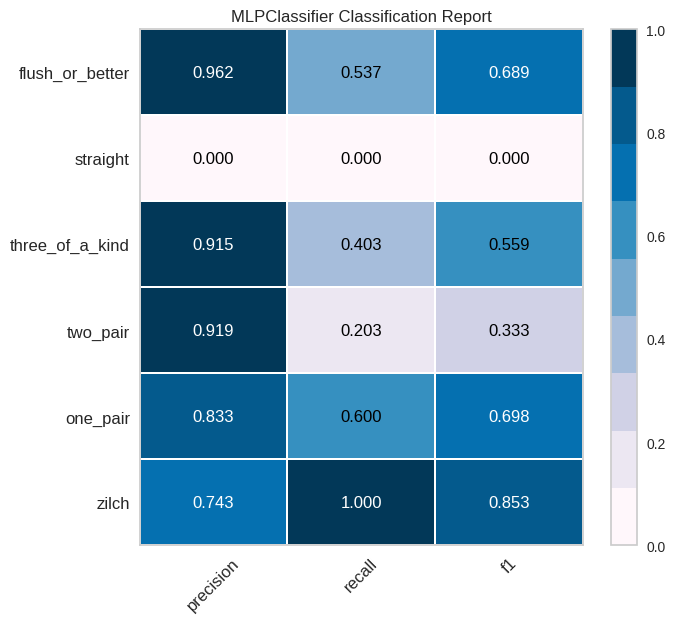

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [26]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

##Step10: class prediction error

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


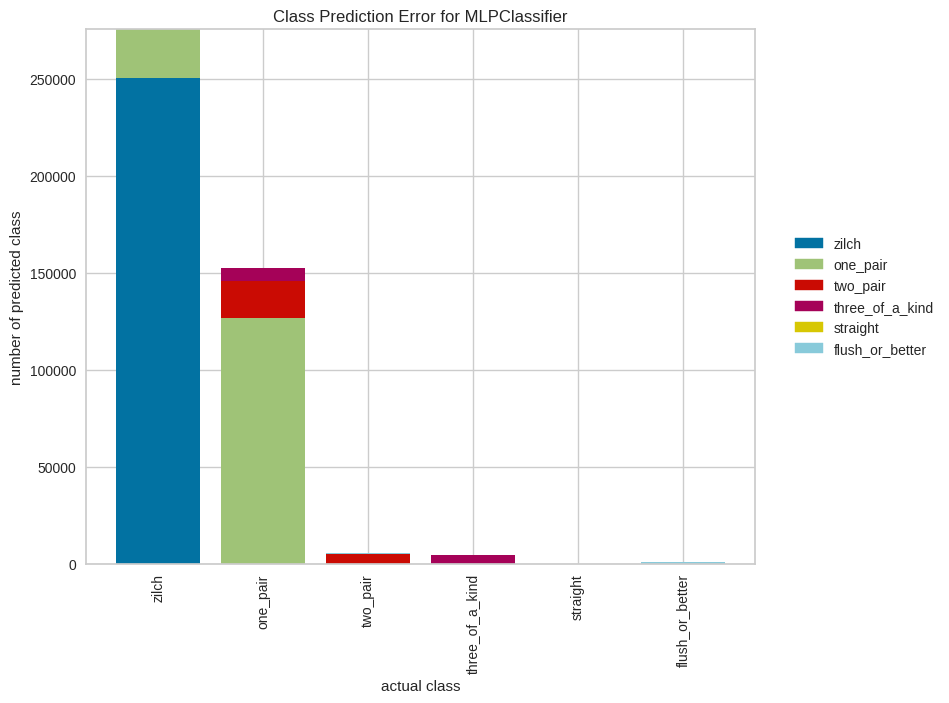

<Axes: title={'center': 'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [27]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()